In [1]:
import pandas as pd

### Loading data

In [14]:
root = r"C:\Users\aleen\Desktop\Reviews\Listings_plus_sentiment\\"
amsterdam = pd.read_csv(root + "amsterdam_listings_plus_sentiment.csv")
athens = pd.read_csv(root+"athens_listings_plus_sentiment.csv")
berlin = pd.read_csv(root+"berlin_listings_plus_sentiment.csv")
copenhagen = pd.read_csv(root+"copenhagen_listings_plus_sentiment.csv")
london = pd.read_csv(root+"london_listings_plus_sentiment.csv")
madrid = pd.read_csv(root+"madrid_listings_plus_sentiment.csv")
paris = pd.read_csv(root+"paris_listings_plus_sentiment.csv")
prague = pd.read_csv(root+"prague_listings_plus_sentiment.csv")
rome = pd.read_csv(root+"rome_listings_plus_sentiment.csv")
vienna = pd.read_csv(root+"vienna_listings_plus_sentiment.csv")

### Shape of datasets?

In [57]:
#
print(amsterdam.shape)
print(athens.shape)
print(berlin.shape)
print(copenhagen.shape)
print(london.shape)
print(madrid.shape)
print(paris.shape)
print(prague.shape)
print(rome.shape)
print(vienna.shape)

(8614, 80)
(4074, 79)
(7411, 79)
(10014, 78)
(21463, 81)
(7187, 80)
(25474, 80)
(6027, 80)
(12042, 80)
(4565, 80)


In [15]:
df_list = [amsterdam, athens, berlin, copenhagen, london, madrid, paris, prague, rome, vienna]

### Droppind useless features

In [59]:
#
drop_list = ["is_business_travel_ready","Pull-out Sofa","Futon",
                    "calculated_host_listings_count_shared_rooms","calculated_host_listings_count_entire_homes",
                    "calculated_host_listings_count_shared_rooms","calculated_host_listings_count_private_rooms",
                    "require_guest_phone_verification","beds","Private room",
                    "house","Hotel room","flexible","moderate","host_response_rate","no_response",
                    "reviews_per_month","amenities_common",
                    "image_id","id","listing_url",
                    'super_strict_30','super_strict_60','strict','strict_14_with_grace_period',
             'moderate_new',
         'flexible_new',
         'super_strict_60_new',
         'super_strict_30_new',
         'strict_new', 
             'Unnamed: 0','summary_text'
            ]

In [60]:
for df in df_list:
    for feature in drop_list:
        if feature in df.columns.values:
            df.drop(feature, inplace = True, axis =1)

In [61]:
def normalize_price(df,feature,method="standard score"):
    '''
    In statistics, the standard score is the signed fractional number of standard 
    deviations by which the value of an observation or data point is above or below 
    the mean value of what is being observed or measured.
    '''
    # This should get rid of the need to convert currency.
    # And, most importantly, we can now concatenate different listings DF for different cities and even times.
    if method == "standard score":
        df[feature] = (df[feature] - df[feature].mean())/df[feature].std()
        #normalized_df=(df-df.mean())/df.std()

### Add city as a feature

In [16]:
city_category_list = ['Amsterdam', 'Athens', 'Berlin', 'Copenhagen', 'London', 'Madrid', 'Paris', 'Prague', 'Rome', 'Vienna']
i = 0
for df in df_list:
    df['city'] = city_category_list[i]
    i += 1

### Currency conversion

In [17]:
def convert_to_euro(amount,currency):
    '''
    This converter uses no API at the moment. Just need to update the currency rate list.
    You input the amount of currency you want to convert and the currency you convert to.
    '''
    rates = [(0.13,"DKK"),(1.10,"GBP"),(1.0,"EUR"),(0.037,'CZK')]

    def getall(my_list, s):
        index = [x for x, y in my_list if y==s] # Very versatile. 
        return (index[0])

    rate = getall(rates, currency)
    out = amount * rate
    return (out)

In [18]:
def convert_prices_in_dataframe(df, local_currency):
    prices_list = ['price','security_deposit','cleaning_fee','extra_people','weekly_price','monthly_price']
    for p in prices_list:
        df[p] = df.apply(lambda x: convert_to_euro(x[p], local_currency), axis=1)

In [19]:
convert_prices_in_dataframe(copenhagen, 'DKK')
convert_prices_in_dataframe(london, 'GBP')
convert_prices_in_dataframe(prague, 'CZK')

### Optional Normalization of prices

In [121]:
prices_list = ['price','security_deposit','cleaning_fee','extra_people','weekly_price','monthly_price']
for df in df_list:
    for n in prices_list:
        normalize_price(df,n)

### Merging datasets

In [20]:
df_final = pd.concat(df_list, ignore_index=True)

C:\Users\aleen\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [21]:
df_final.shape

(106871, 87)

### One-hot encoding city

In [68]:
def make_dummy(df, feature):
    dummy = pd.get_dummies(df[feature])
    return(dummy)

In [69]:
dummy = make_dummy(df_final,"city")
df_final = df_final.join(dummy)

In [49]:
#df_final.drop('city', axis = 1, inplace=True)

### Renaming some features

In [70]:
df_final.rename(columns={'summary': 'words_summary','space' : 'words_space','description':'words_description',
                         'neighborhood_overview':'words_neighborhood_overview','notes':'words_notes','transit':'words_transit',
                         'access':'words_access','interaction':'words_interaction','house_rules':'words_house_rules',
                         'host_about':'words_host_about',
                         'accommodates':'size_accommodates','bathrooms':'size_bathrooms','bedrooms':'size_bedrooms',
                         'ambiguous':'type_ambiguous','b&b':'type_b&b','hotel':'type_hotel','other':'type_other',
                         'secondary':'type_secondary','unique':'type_unique',
                         'a few days or more':'response_days','within a day':'response_day','within a few hours':'response_hours',
                         'within an hour':'response_hour',
                         'Entire home/apt':'renting_entire_home','Shared room':'renting_shared_room',
                         'Airbed':'bedtype_airbed','Couch':'bedtype_couch','Real Bed':'bedtype_real_bed',
                         'reviews_sentiment':'sentiment_reviews','summary_sentiment':'sentiment_summary'
}, inplace=True)

### Inspecting data one last time

In [77]:
df_final.distance_to_center

0         0.007099
1         0.002745
2         0.012671
3         0.003452
4         0.016978
5         0.006589
6         0.003669
7         0.008623
8         0.003159
9         0.009667
10        0.011056
11        0.009899
12        0.008282
13        0.004389
14        0.004382
15        0.008162
16        0.012935
17        0.007701
18        0.009141
19        0.012789
20        0.005586
21        0.008607
22        0.013143
23        0.007443
24        0.010555
25        0.000870
26        0.008969
27        0.012153
28        0.009284
29        0.001155
            ...   
106841    0.002802
106842    0.006378
106843    0.010334
106844    0.025842
106845    0.003221
106846    0.005107
106847    0.004831
106848    0.007409
106849    0.013576
106850    0.008447
106851    0.010146
106852    0.004955
106853    0.006855
106854    0.004192
106855    0.006120
106856    0.004966
106857    0.006159
106858    0.005063
106859    0.003624
106860    0.006861
106861    0.002501
106862    0.

#### Optional in case of normalizing prices

In [22]:
df_final['security_deposit'].fillna(0.0, inplace=True)
df_final.isna().sum()

Airbed                                  0
Couch                                   0
Entire home/apt                         0
Futon                                   0
Hotel room                              0
Private room                            0
Pull-out Sofa                           0
Real Bed                                0
Shared room                             0
Unnamed: 0                              0
a few days or more                      0
access                                  0
accommodates                            0
ambiguous                               0
amenities_access                        0
amenities_additional                    0
amenities_common                        0
amenities_family                        0
amenities_location                      0
amenities_logistics                     0
amenities_pets                          0
amenities_safety                        0
amenities_spacious                      0
amenities_special_needs           

### Saving data to CSV

In [24]:
df_final.to_csv(r"C:\Users\aleen\Desktop\Reviews\Merged_listings_plus_sentiment\europe_listings_march.csv")

In [23]:
df_final.city

0         Amsterdam
1         Amsterdam
2         Amsterdam
3         Amsterdam
4         Amsterdam
5         Amsterdam
6         Amsterdam
7         Amsterdam
8         Amsterdam
9         Amsterdam
10        Amsterdam
11        Amsterdam
12        Amsterdam
13        Amsterdam
14        Amsterdam
15        Amsterdam
16        Amsterdam
17        Amsterdam
18        Amsterdam
19        Amsterdam
20        Amsterdam
21        Amsterdam
22        Amsterdam
23        Amsterdam
24        Amsterdam
25        Amsterdam
26        Amsterdam
27        Amsterdam
28        Amsterdam
29        Amsterdam
            ...    
106841       Vienna
106842       Vienna
106843       Vienna
106844       Vienna
106845       Vienna
106846       Vienna
106847       Vienna
106848       Vienna
106849       Vienna
106850       Vienna
106851       Vienna
106852       Vienna
106853       Vienna
106854       Vienna
106855       Vienna
106856       Vienna
106857       Vienna
106858       Vienna
106859       Vienna


### EDA

In [84]:
def scatter_plotly(df, var1, var2, color_var = None, size_var = None, hover_data = []):
    
    import plotly.express as px
    fig = px.scatter(df, x=var1, y=var2, color = color_var, size = size_var, hover_data = hover_data)
    fig.show()
    
#####################################################################################################
def scatter_plot(df, var1, var2, seaborn = True):
    '''
    This function is used to print a scatter plot. 
    It uses either Seaborn of Matplotlib as backend.
    
    Input: A dataframe, and the column names of the variables of interest. 
            
    Dependencies: Matplotlib and also Seaborn is optional. 
    
    '''
    
    # Importing neccesary modules. 
    import matplotlib.pyplot as plt
    %matplotlib inline
    
    # Seaborn is optional. It makes the graphs prettier. 
    if seaborn == True:
        import seaborn as sns
        sns.set()
        
        # Building a scatterplot with seaborn 
        plt.rcParams["figure.figsize"] = (9,6)
        ax = sns.scatterplot(df[var1], df[var2])
        
        # Adding custom title and axes labels
        ax.set_title("Scatter Plot of %s and %s" % (var1, var2), fontsize =16, fontweight = 'bold').set_position([.5, 1.05])
        ax.set_xlabel(var1, fontsize = 13)
        ax.set_ylabel(var2, fontsize = 13)
        
        # Adding a legend
        plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
        
    else:
        plt.rcParams["figure.figsize"] = (9,6)
        plt.scatter(df[var1], df[var2])


In [85]:
df = df_final

No handles with labels found to put in legend.


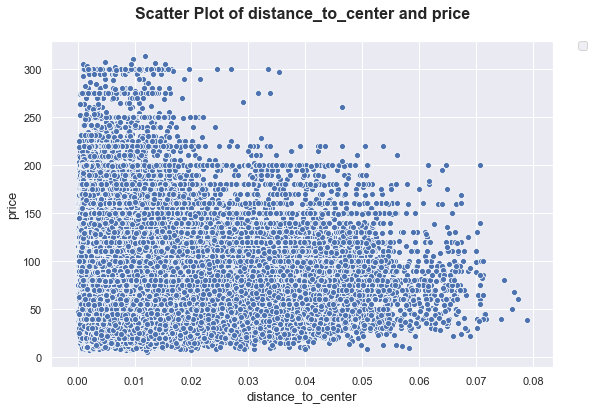

In [86]:
scatter_plot(df,'distance_to_center','price')

No handles with labels found to put in legend.


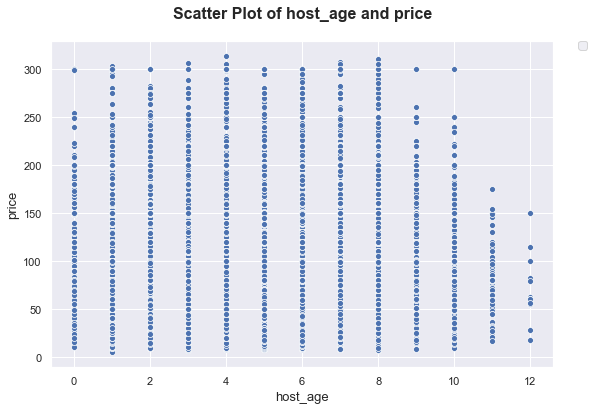

In [87]:
scatter_plot(df,'host_age','price')

No handles with labels found to put in legend.


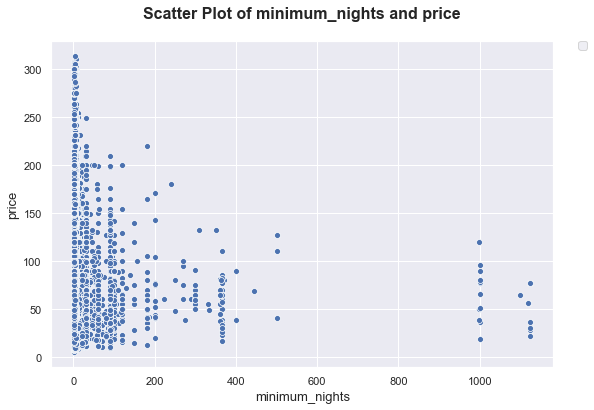

In [94]:
scatter_plot(df,'minimum_nights','price')